First 5 rows of the dataset:
    Height_m  Diameter_cm  Leaf_Width_cm  Leaf_Length_cm  Bark_Texture_Score  \
0  27.483571    71.354829      12.250449       23.703572                   9   
1  24.308678    46.167520      11.141189       17.818018                   9   
2  28.238443    73.044089      12.244595       15.874780                   9   
3  32.615149    80.334568      13.086596       13.458857                   9   
4  23.829233    66.201524      12.097720       12.590581                   7   

  Species  
0     Oak  
1     Oak  
2     Oak  
3     Oak  
4     Oak  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Height_m            600 non-null    float64
 1   Diameter_cm         600 non-null    float64
 2   Leaf_Width_cm       600 non-null    float64
 3   Leaf_Length_cm      600 non-null    float6

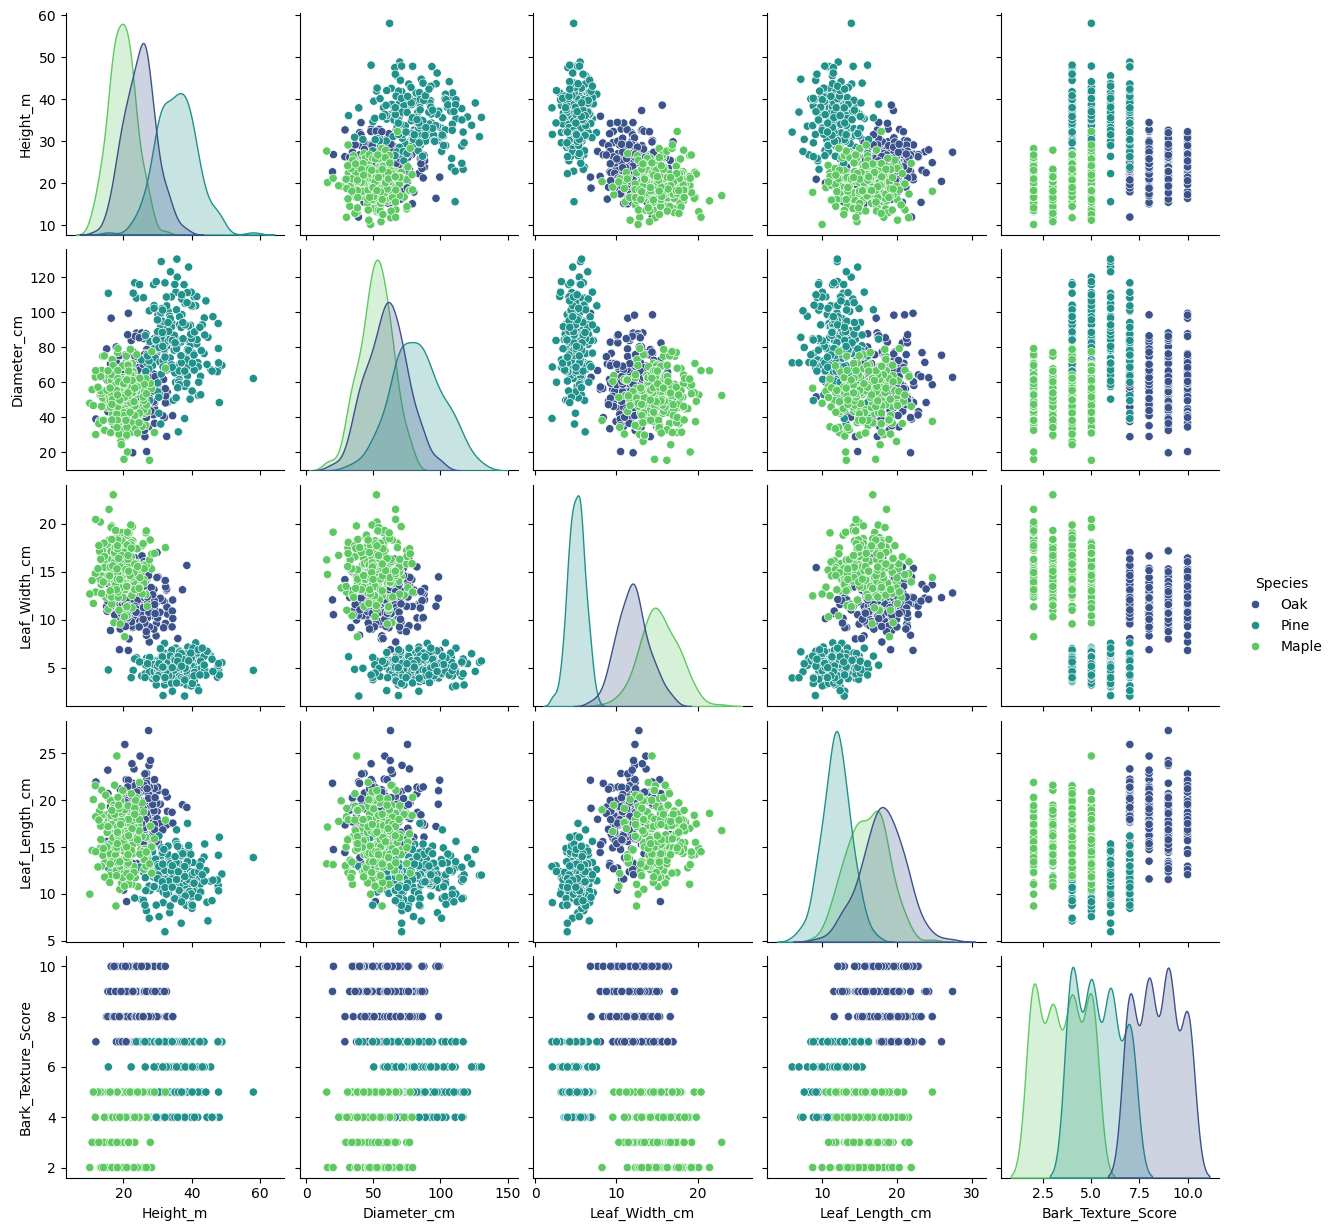

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

np.random.seed(42)
data = {
    'Height_m': np.concatenate([
        np.random.normal(25, 5, 200),
        np.random.normal(35, 6, 200),
        np.random.normal(20, 4, 200)
    ]),
    'Diameter_cm': np.concatenate([
        np.random.normal(60, 15, 200),
        np.random.normal(80, 20, 200),
        np.random.normal(50, 12, 200)
    ]),
    'Leaf_Width_cm': np.concatenate([
        np.random.normal(12, 2, 200),
        np.random.normal(5, 1, 200),
        np.random.normal(15, 2.5, 200)
    ]),
    'Leaf_Length_cm': np.concatenate([
        np.random.normal(18, 3, 200),
        np.random.normal(12, 2, 200),
        np.random.normal(16, 2.8, 200)
    ]),
    'Bark_Texture_Score': np.concatenate([
        np.random.randint(7, 11, 200),
        np.random.randint(4, 8, 200),
        np.random.randint(2, 6, 200)
    ]),
    'Species': ['Oak'] * 200 + ['Pine'] * 200 + ['Maple'] * 200
}
df = pd.DataFrame(data)
df['Height_m'] = df['Height_m'].clip(lower=5)
df['Diameter_cm'] = df['Diameter_cm'].clip(lower=10)
df['Leaf_Width_cm'] = df['Leaf_Width_cm'].clip(lower=1)
df['Leaf_Length_cm'] = df['Leaf_Length_cm'].clip(lower=3)
df.to_csv('tree_species_data.csv', index=False)

df = pd.read_csv('tree_species_data.csv')

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nStatistical Summary:")
print(df.describe())

sns.pairplot(df, hue='Species', palette='viridis')
plt.savefig('species_pairplot.png')

X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))